In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [2]:
data = pd.read_csv('Combined_dataset.csv')

In [3]:
data2 = data.drop(['감정_str'], axis = 1)

In [4]:
data2['발화'].nunique(), data2['감정_int'].nunique()

(89731, 7)

In [5]:
data2.drop_duplicates(subset = ["발화"], inplace = True)

In [6]:
data2.isnull().sum()

발화        0
감정_int    0
dtype: int64

In [7]:
from sklearn.model_selection import train_test_split

train1, train2 = train_test_split(data2, test_size=0.25, random_state=0)

In [8]:
train1['발화'] = train1['발화'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train2['발화'] = train2['발화'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

<ipython-input-8-94f5e7172e7d>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train1['발화'] = train1['발화'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
<ipython-input-8-94f5e7172e7d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1['발화'] = train1['발화'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
<ipython-input-8-94f5e7172e7d>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train2['발화'] = train2['발화'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
<ipython-input-8-94f5e7172e7d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [9]:
train1['발화'] = train1['발화'].str.replace('^ +', "")
train2['발화'] = train2['발화'].str.replace('^ +', "")
train1['발화'].replace('', np.nan, inplace = True)
train2['발화'].replace('', np.nan, inplace = True)
print(train1.isnull().sum())
print(train2.isnull().sum())

<ipython-input-9-4ae6611874fe>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train1['발화'] = train1['발화'].str.replace('^ +', "")
<ipython-input-9-4ae6611874fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1['발화'] = train1['발화'].str.replace('^ +', "")


발화        4
감정_int    0
dtype: int64
발화        6
감정_int    0
dtype: int64


<ipython-input-9-4ae6611874fe>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train2['발화'] = train2['발화'].str.replace('^ +', "")
<ipython-input-9-4ae6611874fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train2['발화'] = train2['발화'].str.replace('^ +', "")
C:\Users\user\.conda\envs\me\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [10]:
train1.loc[train1.발화.isnull()][:10]
train2.loc[train2.발화.isnull()][:10]
train1 = train1.dropna()
train2 = train2.dropna()

In [11]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']
okt = Okt()
okt.morphs('와 이런 것도 영화라고 차라리 뮤직비디오를 만드는 게 나을 뻔', stem = True)

['오다', '이렇다', '것', '도', '영화', '라고', '차라리', '뮤직비디오', '를', '만들다', '게', '나다', '뻔']

In [12]:
t_train1 = []
t_train2 = []
for sentence in train1['발화']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    t_train1.append(temp_X)
    
for sentence in train2['발화']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    t_train2.append(temp_X)

In [13]:
import nltk
nltk.download('punkt')
nltk.download('treebank')

from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import TreebankWordTokenizer

tb_tokenizer = TreebankWordTokenizer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!


In [14]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(t_train1)
tokenizer.fit_on_texts(t_train2)

In [15]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 28036
등장 빈도가 2번 이하인 희귀 단어의 수: 15640
단어 집합에서 희귀 단어의 비율: 55.78541874732487
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.8476659049573287


In [16]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 12397


In [17]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(t_train1)
t_train11 = tokenizer.texts_to_sequences(t_train1)
tokenizer.fit_on_texts(t_train2)
t_train22 = tokenizer.texts_to_sequences(t_train2)

In [18]:
emo1 = train1['감정_int']
emo2 = train2['감정_int']

리뷰의 최대 길이 : 112
리뷰의 평균 길이 : 7.454631913692157


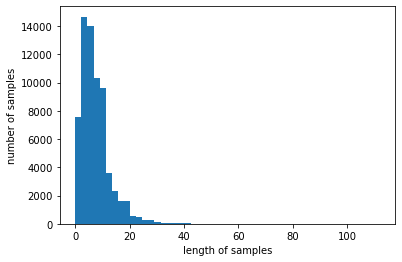

In [19]:
print('리뷰의 최대 길이 :',max(len(l) for l in t_train11))
print('리뷰의 평균 길이 :',sum(map(len, t_train11))/len(t_train11))
plt.hist([len(s) for s in t_train11], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [20]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [21]:
max_len = 20
below_threshold_len(max_len, t_train11)

전체 샘플 중 길이가 20 이하인 샘플의 비율: 96.9506939697447


In [22]:
t_train111 = pad_sequences(t_train11, maxlen = max_len)
t_train222 = pad_sequences(t_train22, maxlen = max_len)

In [23]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [24]:
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
enc = LabelEncoder()
enc.fit(emo1)
emo1_label = enc.transform(emo1)
print(emo1_label)
enc.fit(emo2)
emo2_label = enc.transform(emo2)
print(emo2_label)

[1 3 4 ... 1 5 1]
[1 1 5 ... 1 1 1]


In [25]:
emo1_enc = tf.keras.utils.to_categorical(emo1_label)
emo2_enc = tf.keras.utils.to_categorical(emo2_label)

In [26]:
t_train111[0]

array([   0,    0,    0,    0,    0,  193,   23,   70, 4285,    3, 3814,
          7, 1707, 1759,    3, 4285,  499,    4, 1577,  830])

In [27]:
emo1_enc.shape

(67294, 7)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(256,  activation = 'relu'))
model.add(Dense(128,  activation = 'relu'))
model.add(Dense(64,  activation = 'relu'))
model.add(Dense(32,  activation = 'relu'))
model.add(Dense(16,  activation = 'relu'))
model.add(Dense(32,  activation = 'relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(7,activation = 'softmax'))
    
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model.fit(t_train111, emo1_enc, epochs=50, batch_size = 100)

print(model.evaluate(t_train111,emo1_enc))

Epoch 1/50
673/673 [==============================] - 3s 3ms/step - loss: 1.7186 - accuracy: 0.5010
Epoch 2/50
673/673 [==============================] - 2s 2ms/step - loss: 1.5656 - accuracy: 0.5069
Epoch 3/50
673/673 [==============================] - 2s 2ms/step - loss: 1.5645 - accuracy: 0.5069
Epoch 4/50
673/673 [==============================] - 2s 2ms/step - loss: 1.5695 - accuracy: 0.5063
Epoch 5/50
673/673 [==============================] - 2s 2ms/step - loss: 1.5657 - accuracy: 0.5069
Epoch 6/50
673/673 [==============================] - 2s 2ms/step - loss: 1.5651 - accuracy: 0.5069
Epoch 7/50
673/673 [==============================] - 2s 2ms/step - loss: 1.5647 - accuracy: 0.5069
Epoch 8/50
673/673 [==============================] - 2s 2ms/step - loss: 1.5649 - accuracy: 0.5069
Epoch 9/50
673/673 [==============================] - 2s 2ms/step - loss: 1.5648 - accuracy: 0.5069
Epoch 10/50
673/673 [==============================] - 2s 2ms/step - loss: 1.5647 - accuracy: 0.5069

model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(7,activation = 'softmax'))

In [30]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [31]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(t_train111, emo1_enc, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/15
898/898 [==============================] - 34s 33ms/step - loss: 0.3243 - acc: 0.5102 - val_loss: 0.3063 - val_acc: 0.5274

Epoch 00001: val_acc improved from -inf to 0.52738, saving model to best_model.h5
Epoch 2/15
898/898 [==============================] - 29s 32ms/step - loss: 0.2852 - acc: 0.5671 - val_loss: 0.2890 - val_acc: 0.5723

Epoch 00002: val_acc improved from 0.52738 to 0.57233, saving model to best_model.h5
Epoch 3/15
898/898 [==============================] - 29s 32ms/step - loss: 0.2591 - acc: 0.6033 - val_loss: 0.2862 - val_acc: 0.5798

Epoch 00003: val_acc improved from 0.57233 to 0.57984, saving model to best_model.h5
Epoch 4/15
898/898 [==============================] - 29s 32ms/step - loss: 0.2368 - acc: 0.6380 - val_loss: 0.2999 - val_acc: 0.5729

Epoch 00004: val_acc did not improve from 0.57984
Epoch 5/15
898/898 [==============================] - 30s 34ms/step - loss: 0.2199 - acc: 0.6660 - val_loss: 0.3112 - val_acc: 0.5732

Epoch 00005: val_acc di

In [32]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(t_train222, emo2_enc)[1]))

701/701 [==============================] - 4s 5ms/step - loss: 0.3884 - acc: 0.4610

 테스트 정확도: 0.4610


In [33]:
def sentiment_predict(new_sentence):
    new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
    new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
    encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
    pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
    print(pad_new)
    pred = loaded_model.predict(pad_new)
    print(np.argmax(pred))

In [39]:
print('1:행복, 2:중립, 3:슬픔, 4:공포, 5:혐오, 6:분노, 7:놀람.\n')
sentiment_predict('먹는데 머리카락 나왔어')


1:행복, 2:중립, 3:슬픔, 4:공포, 5:혐오, 6:분노, 7:놀람.

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0   40 4646   66]]
1


In [35]:
print(t_train1[3731])
print(t_train111[3731])
print(emo1[3731])

['대통령', '짓', '보다', '덜', '위험하다']
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0  251  395    4 1500  865]
4
